<a href="https://colab.research.google.com/github/myke11j/pytorch-example/blob/master/Linear_Regression_using_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [0]:
from fastai.basics import *

# Linear Regression problem


### Generate data

In [0]:
n=100

In [0]:
x = torch.ones(n, 2)

Using underscore `_` after the function means, it won't return anything but make changes in orginal caller. It's similar to panda's `inplace=True`

In [18]:
x[:,0].uniform_(-1.,1)

tensor([-5.5772e-01,  5.2749e-01, -4.1226e-01,  9.1991e-01,  6.3841e-02,
         6.3434e-01,  9.0973e-01, -4.3516e-01, -8.5953e-01, -8.5664e-04,
         1.7077e-01, -8.7661e-01,  4.3637e-01,  3.3705e-01, -6.2598e-01,
         2.9098e-01, -6.4513e-01, -3.2215e-02,  3.4401e-01, -3.2037e-01,
        -5.3234e-02,  9.5961e-01,  8.5704e-01, -1.9964e-01, -1.9883e-01,
         6.6278e-01, -3.2204e-01,  5.4532e-01, -3.3621e-01, -7.3574e-01,
         2.8378e-01,  4.1270e-01, -5.3810e-01,  8.1521e-01,  6.0858e-01,
         2.8758e-01,  4.3552e-02,  9.7318e-01,  4.1600e-01,  2.6891e-02,
         5.4765e-01, -5.7223e-02,  5.9749e-01,  9.0732e-01, -9.4289e-01,
        -8.3998e-01,  4.3228e-01, -5.3928e-01, -3.9210e-01, -2.2563e-01,
        -7.0864e-01,  6.1356e-01, -6.0200e-01, -9.2631e-01,  3.8621e-01,
        -6.1000e-01,  5.8507e-01,  7.9650e-01,  2.9834e-01,  7.7067e-01,
         9.2594e-01,  4.8666e-01,  1.4201e-01,  4.5762e-01, -2.9781e-01,
        -5.3808e-01,  6.5872e-01,  9.7129e-01,  6.1

In [19]:
x[:5]


tensor([[-0.5577,  1.0000],
        [ 0.5275,  1.0000],
        [-0.4123,  1.0000],
        [ 0.9199,  1.0000],
        [ 0.0638,  1.0000]])

Here we're creating the parameters randomly to generate out `y`.

In [20]:
a = tensor(3.,2); a

tensor([3., 2.])

In [0]:
y = x@a + torch.rand(n)


In [22]:
y

tensor([ 0.4174,  4.0840,  1.4733,  5.4979,  2.6840,  4.0685,  4.9733,  1.5467,
         0.2178,  2.8269,  3.2382,  0.2310,  3.3885,  3.1042,  0.2012,  3.1193,
         0.2811,  2.6618,  3.5779,  1.2974,  2.1925,  4.9056,  5.1910,  1.6020,
         2.0886,  4.3802,  1.9803,  3.6407,  1.2096, -0.1792,  3.7791,  4.1846,
         1.1020,  4.7301,  4.2451,  3.2792,  2.6640,  5.0021,  4.1847,  2.7233,
         4.5395,  1.9380,  3.9558,  5.6142, -0.1262,  0.3323,  3.6455,  1.2546,
         1.6184,  2.0670,  0.4194,  3.8764,  0.2960, -0.6342,  3.6358,  0.3913,
         4.3247,  4.9429,  3.2744,  4.3217,  5.0878,  4.3492,  2.8561,  3.9665,
         1.9053,  0.8629,  4.5959,  5.8557,  4.5951,  1.6186,  0.1533, -0.2468,
         1.8398,  4.9618,  4.6902,  0.4449,  1.1916,  3.2482,  0.0234,  0.1772,
         3.3899,  4.7827,  1.9591,  0.7321,  4.9745,  0.9454,  0.4674,  1.4098,
         1.6563,  0.3372,  3.3580,  1.3495,  0.6254,  3.0719,  4.0330,  3.2945,
         0.4591,  4.6493,  1.8228,  4.94

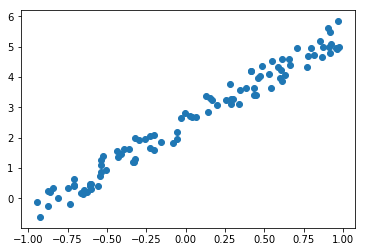

In [23]:
plt.scatter(x[:,0], y);


#### Mean Squaure Error function (loss function)

In [0]:
def mse(y_pred, y):
  return ((y_pred - y) ** 2).mean()

#### Run linear regression using random weight/parameter

In [0]:
a = tensor(1.,-1)

In [0]:
y_pred = x@a

In [36]:
mse(y_pred, y)

tensor(14.1328)

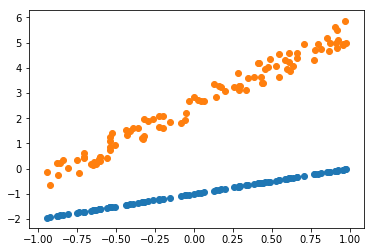

In [42]:
plt.scatter(x[:,0], y_pred)
plt.scatter(x[:,0], y)

#### Gradient Descent

This was bad, but now we can start using Gradient Descent to change the gradient and intercept of paramteres (`a`) to see when loss becomes the minimum

In [0]:
def update():
  y_pred = x@a
  loss = mse(y_pred, y)
  if t % 10 == 0: 
    print(loss)
  loss.backward()
  with torch.no_grad():
    a.sub_(lr * a.grad)
    a.grad.zero_()

In [43]:
lr = 1e-1
a = nn.Parameter(a);
a


Parameter containing:
tensor([ 1., -1.], requires_grad=True)

In [44]:
for t in range(100): update()

tensor(14.1328, grad_fn=<MseLossBackward>)
tensor(0.4701, grad_fn=<MseLossBackward>)
tensor(0.1445, grad_fn=<MseLossBackward>)
tensor(0.0992, grad_fn=<MseLossBackward>)
tensor(0.0885, grad_fn=<MseLossBackward>)
tensor(0.0859, grad_fn=<MseLossBackward>)
tensor(0.0852, grad_fn=<MseLossBackward>)
tensor(0.0851, grad_fn=<MseLossBackward>)
tensor(0.0850, grad_fn=<MseLossBackward>)
tensor(0.0850, grad_fn=<MseLossBackward>)


Our loss just went down drastically. Awesome!

#### Animate it

In [0]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [0]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

In [0]:
def animate(i):
  update()
  line.set_ydata(x@a)
  return line,

In [57]:
animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)
